In [1]:
from pathlib import Path
import zipfile
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb
import plotly.express as px
sklearn.set_config(display="diagram")

np.random.seed(42)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# def load_data():
#     tarball_path = Path("datasets/dataset.csv.gz")
#     if not tarball_path.is_file():
#         Path("datasets").mkdir(parents=True, exist_ok=True)
#         url = "https://github.com/CK-ssos/data_mining_assignment/blob/0770dada480776bc67841f8d0c2fa594560114eb/dataset.csv.gz"
#         urllib.request.urlretrieve(url, tarball_path)
#         with tarfile.open(tarball_path) as dataset_tarball:
#             dataset_tarball.extractall(path="datasets")
#     return pd.read_csv(Path("datasets/dataset.csv"))

# def load_data():
#     zip_file_path = Path("datasets/dataset.zip")
#     if not zip_file_path.is_file():
#         Path("datasets").mkdir(parents=True, exist_ok=True)
#         url = "https://github.com/CK-ssos/data_mining_assignment/blob/8aa4cc8249b3a2bd0f402ca2c1e6c19fbb08f1bb/dataset.zip"
#         urllib.request.urlretrieve(url, zip_file_path)

#     with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
#         zip_file.extractall(path="datasets")

#     return pd.read_csv(Path("datasets/dataset.csv"))

def load_data():
  return pd.read_csv(Path("dataset.csv"))

#Load the data set
data = load_data()


In [2]:
data.head()

ID  travel_fee             departure_time  departure_long  departure_lat  arrival_long  arrival_lat  occupancy
0  2013-07-02 19:54:00.000000232         7.0  2013-07-02 19:54:00+00:00      -74.005360      40.728867    -74.008913    40.710907          1
1    2013-09-28 00:21:31.0000002         5.5  2013-09-28 00:21:31+00:00      -74.014165      40.708941    -74.016310    40.716734          1
2  2013-06-16 03:18:00.000000150        21.5  2013-06-16 03:18:00+00:00      -73.991075      40.760352    -73.941382    40.713292          1
3  2013-07-20 13:43:00.000000121         9.5  2013-07-20 13:43:00+00:00      -74.002662      40.723630    -73.991722    40.748905          5
4    2013-11-05 22:57:17.0000003        15.5  2013-11-05 22:57:17+00:00      -73.962397      40.712705    -73.996834    40.680403          2

In [3]:
data.describe()

travel_fee  departure_long  departure_lat  arrival_long   arrival_lat     occupancy
count  2.596558e+06    2.596558e+06   2.596558e+06  2.596514e+06  2.596514e+06  2.596558e+06
mean   1.259551e+01   -7.243741e+01   3.974318e+01 -7.239685e+01  3.972336e+01  1.709320e+00
std    1.081654e+01    1.125115e+01   9.133454e+00  1.143503e+01  8.438912e+00  1.375425e+00
min   -5.200000e+01   -7.400217e+02  -3.124490e+03 -1.216417e+03 -3.111707e+03  0.000000e+00
25%    6.500000e+00   -7.399220e+01   4.073442e+01 -7.399147e+01  4.073352e+01  1.000000e+00
50%    9.500000e+00   -7.398186e+01   4.075236e+01 -7.398023e+01  4.075279e+01  1.000000e+00
75%    1.400000e+01   -7.396680e+01   4.076704e+01 -7.396362e+01  4.076779e+01  2.000000e+00
max    5.000000e+02    8.343336e+01   2.342817e+03  1.428740e+03  4.739714e+02  9.000000e+00

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596558 entries, 0 to 2596557
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              object 
 1   travel_fee      float64
 2   departure_time  object 
 3   departure_long  float64
 4   departure_lat   float64
 5   arrival_long    float64
 6   arrival_lat     float64
 7   occupancy       int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 158.5+ MB


In [5]:
#to find the missing value percentage
missingVal = data.isnull().sum() * 100 / len(data)
missingVal_df = pd.DataFrame({'count': data.count(),
                              'data type': data.dtypes,
                                 'percent_missing': missingVal})
missingVal_df

count data type  percent_missing
ID              2596558    object         0.000000
travel_fee      2596558   float64         0.000000
departure_time  2596558    object         0.000000
departure_long  2596558   float64         0.000000
departure_lat   2596558   float64         0.000000
arrival_long    2596514   float64         0.001695
arrival_lat     2596514   float64         0.001695
occupancy       2596558     int64         0.000000

In [6]:
x=(data['occupancy'].value_counts())
p = sb.countplot(data=data, x="occupancy")
plt.title('Total count of occupancy in each trip')

Text(0.5, 1.0, 'Total count of occupancy in each trip')

In [7]:
print('Count of Occupancy per trips')
data['occupancy'].value_counts()

Count of Occupancy per trips


1    1828996
2     352307
5     150316
3     109306
6     101480
4      54084
0         66
9          2
7          1
Name: occupancy, dtype: int64

Text(0.5, 1.0, 'Travel Fee')

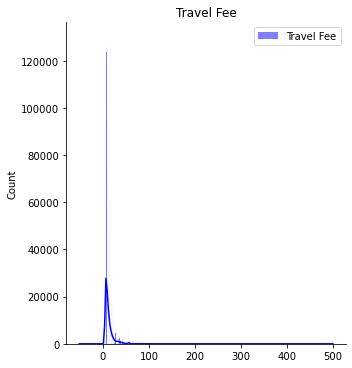

In [8]:
sb.displot(data['travel_fee'].values, color = 'blue', label = 'Travel Fee', kde = True)
plt.legend()
plt.title('Travel Fee')

In [9]:
df = pd.DataFrame(data)
total_fare_by_occupancy = df.groupby('occupancy')['travel_fee'].sum()
print("The total fare by each occupancy")
print(total_fare_by_occupancy)

The total fare by each occupancy
occupancy
0        1797.32
1    22706206.93
2     4696000.27
3     1408284.99
4      709918.48
5     1907718.62
6     1274983.80
7          25.00
9          25.50
Name: travel_fee, dtype: float64


In [10]:
# df['departure_time'] = pd.to_datetime(df['departure_time'])
# df['hour'] = df['departure_time'].dt.hour+1
# average_fare_by_time = df.groupby('hour')['travel_fee'].mean()
# average_fare_by_time

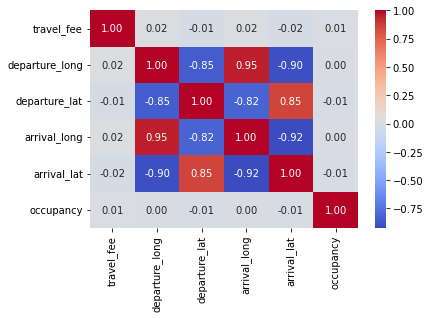

In [11]:
correlation_matrix = data.corr()
sb.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt=".2f")
plt.show()

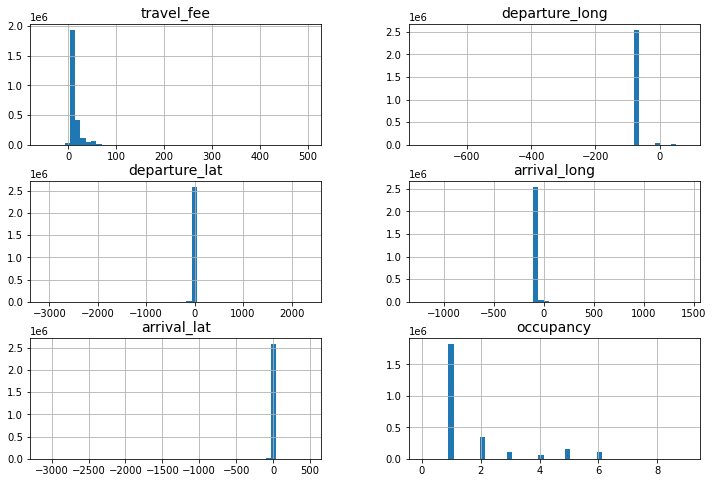

In [12]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
plt.show()

In [13]:
data.isna().sum()

ID                 0
travel_fee         0
departure_time     0
departure_long     0
departure_lat      0
arrival_long      44
arrival_lat       44
occupancy          0
dtype: int64

In [14]:
data.eq(0).sum()

ID                    0
travel_fee           53
departure_time        0
departure_long    41393
departure_lat     41169
arrival_long      42810
arrival_lat       42616
occupancy            66
dtype: int64

In [15]:
cat_att = ['ID']
num_att = ['travel_fee','departure_time','departure_lang','departure_lat','arrival_long','arrival_lat','occupancy']


In [16]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(data, train_size=0.20 , test_size=0.05, random_state=42)

print("Length of train_set:", len(train))
print("Length of test_set:", len(test))

Length of train_set: 519311
Length of test_set: 129828


In [17]:
print("\nSummary statistics:")
print(train.describe())


Summary statistics:
          travel_fee  departure_long  departure_lat   arrival_long    arrival_lat      occupancy
count  519311.000000   519311.000000  519311.000000  519305.000000  519305.000000  519311.000000
mean       12.580712      -72.411645      39.725703     -72.364888      39.701255       1.709136
std        10.753221       11.333576       8.267027      11.697018       8.324226       1.375489
min       -27.500000     -124.500000     -74.017277    -736.050000     -74.186632       0.000000
25%         6.500000      -73.992192      40.734422     -73.991440      40.733532       1.000000
50%         9.500000      -73.981837      40.752408     -73.980212      40.752837       1.000000
75%        14.000000      -73.966785      40.767122     -73.963655      40.767850       2.000000
max       337.250000       40.851067      73.996983    1428.740223      73.973785       9.000000


In [18]:
train.isna().sum()

ID                0
travel_fee        0
departure_time    0
departure_long    0
departure_lat     0
arrival_long      6
arrival_lat       6
occupancy         0
dtype: int64

In [19]:
train.eq(0).sum()

ID                   0
travel_fee          10
departure_time       0
departure_long    8347
departure_lat     8299
arrival_long      8661
arrival_lat       8619
occupancy           10
dtype: int64

In [20]:
# Analyzing numerical variables
num_attr = [
    'travel_fee', 'departure_long', 'departure_lat', 'arrival_long','arrival_lat','occupancy'
]

for column in num_attr:
    print("\nStatistics for", column)
    print("Minimum:", train[column].min())
    print("Maximum:", train[column].max())
    print("Mean:", train[column].mean())
    print("Standard deviation:", train[column].std())


Statistics for travel_fee
Minimum: -27.5
Maximum: 337.25
Mean: 12.580712328452012
Standard deviation: 10.753221139112954

Statistics for departure_long
Minimum: -124.5
Maximum: 40.851067
Mean: -72.41164456360433
Standard deviation: 11.333575993798668

Statistics for departure_lat
Minimum: -74.017277
Maximum: 73.996983
Mean: 39.72570250869659
Standard deviation: 8.26702735190465

Statistics for arrival_long
Minimum: -736.05
Maximum: 1428.740223
Mean: -72.36488776377834
Standard deviation: 11.69701831260346

Statistics for arrival_lat
Minimum: -74.186632
Maximum: 73.973785
Mean: 39.701255497674914
Standard deviation: 8.324225794325294

Statistics for occupancy
Minimum: 0
Maximum: 9
Mean: 1.7091357587264664
Standard deviation: 1.3754885185344998


In [21]:
train=train.loc[train['travel_fee']>0]
train=train.loc[train['occupancy']>0]
train.shape

(519281, 8)

In [22]:
train.eq(0).sum()

ID                   0
travel_fee           0
departure_time       0
departure_long    8340
departure_lat     8292
arrival_long      8652
arrival_lat       8610
occupancy            0
dtype: int64

In [23]:
train = train.loc[train['departure_long']!=0]
train = train.loc[train['departure_lat']!=0]
train = train.loc[train['arrival_long']!=0]
train = train.loc[train['arrival_lat']!=0]

In [24]:
train.eq(0).sum()

ID                0
travel_fee        0
departure_time    0
departure_long    0
departure_lat     0
arrival_long      0
arrival_lat       0
occupancy         0
dtype: int64

In [25]:
train.shape

(510335, 8)

In [26]:
corr_matrix = train.corr()
corr_matrix["travel_fee"].sort_values(ascending=False)

travel_fee        1.000000
occupancy         0.011638
departure_long    0.004117
arrival_long      0.003034
arrival_lat      -0.002457
departure_lat    -0.002595
Name: travel_fee, dtype: float64

Text(0.5, 1.0, 'Distribution of Travel Fee')

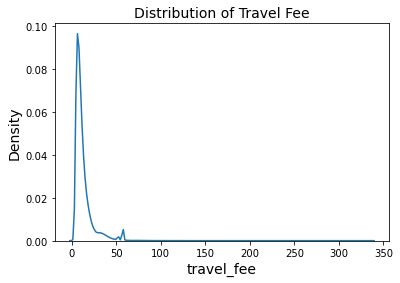

In [27]:
sb.kdeplot(train['travel_fee']).set_title("Distribution of Travel Fee")

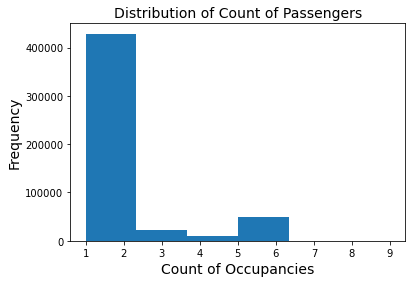

In [28]:
plt.hist(train['occupancy'], bins=6)
plt.xlabel('Count of Occupancies')
plt.ylabel('Frequency')
plt.title('Distribution of Count of Passengers')

plt.show()

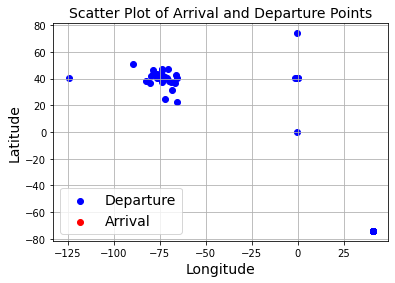

In [29]:
# Plot arrival points in blue
plt.scatter(train[train['occupancy'] == 1]['departure_long'],
            train[train['occupancy'] == 1]['departure_lat'],
            color='blue', label='Departure')

# Plot departure points in red
plt.scatter(train[train['occupancy'] == 0]['arrival_long'],
            train[train['occupancy'] == 0]['arrival_lat'],
            color='red', label='Arrival')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Arrival and Departure Points')
plt.legend()
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='arrival_long', ylabel='arrival_lat'>

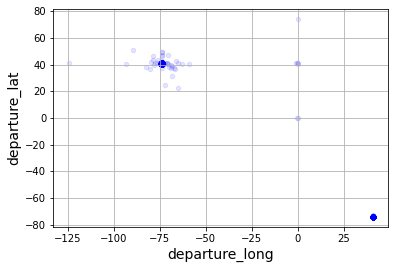

In [30]:
train.plot(kind="scatter", x="departure_long", y="departure_lat", grid=True, color='blue',alpha =0.1)
train.plot(kind="scatter", x="arrival_long", y="arrival_lat", grid=True, color='red',alpha =0.1)

In [31]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# Calculate and add Haversine distance column to the DataFrame
train['distance_km'] = haversine_distance(train['departure_lat'],
                                                     train['departure_long'],
                                                     train['arrival_lat'],
                                                     train['arrival_long'])

In [32]:
train['distance_km'].describe()

count    510335.000000
mean          3.691791
std          38.212149
min           0.000000
25%           1.278044
50%           2.194043
75%           3.985493
max        8634.972734
Name: distance_km, dtype: float64

In [33]:
train.head()

ID  travel_fee             departure_time  departure_long  departure_lat  arrival_long  arrival_lat  occupancy  distance_km
316766   2013-06-21 12:08:00.000000133         8.0  2013-06-21 12:08:00+00:00      -74.000292      40.747057    -74.007575    40.745992          6     0.624857
1122311  2013-03-02 23:46:00.000000159         9.0  2013-03-02 23:46:00+00:00      -73.988875      40.736447    -74.006502    40.741407          1     1.584204
2534244  2013-02-14 18:44:00.000000226         5.0  2013-02-14 18:44:00+00:00      -73.981167      40.780717    -73.974223    40.784020          5     0.690448
2066123    2013-01-21 15:08:29.0000006        19.0  2013-01-21 15:08:29+00:00      -73.970862      40.761825    -73.956129    40.714208          1     5.438326
70562    2013-05-01 15:19:00.000000168        13.5  2013-05-01 15:19:00+00:00      -73.980480      40.783507    -73.959402    40.772732          2     2.141363

In [34]:
ax = train[train['distance_km']<50]['distance_km'].hist(bins = 25, edgecolor = 'black')
ax.set_title('Distribution of Trip Distance')
ax.set_xlabel('Distance in km')
ax.set_ylabel('Number of Trips')
ax.set_xticks(np.arange(0,51,2))

plt.show()

In [35]:
train['distance_km'].describe()

count    510335.000000
mean          3.691791
std          38.212149
min           0.000000
25%           1.278044
50%           2.194043
75%           3.985493
max        8634.972734
Name: distance_km, dtype: float64

In [36]:
# distances = []
# # Iterate through the dataset and calculate the distance for each ride
# for index, row in train.iterrows():
#     departure_lat = row['departure_lat']
#     departure_lon = row['departure_long']
#     arrival_lat = row['arrival_lat']
#     arrival_lon = row['arrival_long']
#     travel_fee = row['travel_fee']

#     # Calculate the distance for the current ride
#     distance_km = haversine_distance(departure_lat, departure_lon, arrival_lat, arrival_lon)
#     distances.append(distance_km)

# distance_fee_df = pd.DataFrame({'Distance_KM': distances, 'Travel_Fee': train['travel_fee']})

# # Sort the DataFrame based on the 'Distance_KM' column in descending order
# distance_fee_df = distance_fee_df.sort_values(by='Distance_KM', ascending=False)

# # Reset the index of the sorted DataFrame
# distance_fee_df = distance_fee_df.reset_index(drop=True)

# # Display the sorted DataFrame
# print(distance_fee_df)

In [37]:
sb.scatterplot(x='distance_km', y='travel_fee', data=train)
plt.title('Relationship between Distance and Fee')

Text(0.5, 1.0, 'Relationship between Distance and Fee')

In [38]:
train['travel_fee'].describe()

count    510335.000000
mean         12.552146
std          10.616558
min           0.010000
25%           6.500000
50%           9.500000
75%          14.000000
max         337.250000
Name: travel_fee, dtype: float64

In [39]:
### until now can found that the some of the distance is not make sence, max = 8000km++
### fee also mean = 12.54 but max is 450 which mean got outlier

In [40]:
train = train.loc[train['distance_km']<=100] ## try to set distance within 100km

In [41]:
train.describe()

travel_fee  departure_long  departure_lat   arrival_long    arrival_lat      occupancy    distance_km
count  510272.000000   510272.000000  510272.000000  510272.000000  510272.000000  510272.000000  510272.000000
mean       12.552003      -73.595399      40.370736     -73.594772      40.371179       1.710948       3.387595
std        10.616025        6.590442       6.589893       6.590406       6.589753       1.376924       3.679219
min         0.010000      -79.710702     -74.017277     -79.710702     -74.186632       1.000000       0.000000
25%         6.500000      -73.992365      40.735697     -73.991612      40.734810       1.000000       1.277929
50%         9.500000      -73.982077      40.752937     -73.980605      40.753442       1.000000       2.193864
75%        14.000000      -73.967859      40.767460     -73.965047      40.768182       2.000000       3.984248
max       337.250000       40.851067      43.651341      40.898057      43.651341       9.000000      94.969443

In [42]:
corr_matrix = train.corr()
corr_matrix["travel_fee"].sort_values(ascending=False)

travel_fee        1.000000
distance_km       0.888171
occupancy         0.011641
departure_long    0.004026
arrival_long      0.003324
arrival_lat      -0.002490
departure_lat    -0.002612
Name: travel_fee, dtype: float64

In [43]:
correlation_matrix = train.corr()
sb.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt=".2f")
plt.show()

In [44]:
fig, ax = plt.subplots(1,2)

train.boxplot(column='travel_fee', ax=ax[0])
ax[0].set_title('Trave Fee')
ax[0].set_ylim(-100, 500)

train.boxplot(column='occupancy', ax=ax[1])
ax[1].set_title('Occupancy Count')

plt.show()

In [45]:
train = train.loc[train['travel_fee']<=300] ## try to set travel_fee within rm300

In [46]:
#train['fee_per_km'] = np.where(train['distance_km']<1,
#                                train['travel_fee'],
#                                train['travel_fee']/train['distance_km'])

In [47]:
#train['fee_per_km'].describe()

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510270 entries, 316766 to 486314
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              510270 non-null  object 
 1   travel_fee      510270 non-null  float64
 2   departure_time  510270 non-null  object 
 3   departure_long  510270 non-null  float64
 4   departure_lat   510270 non-null  float64
 5   arrival_long    510270 non-null  float64
 6   arrival_lat     510270 non-null  float64
 7   occupancy       510270 non-null  int64  
 8   distance_km     510270 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 38.9+ MB


In [49]:
corr_matrix = train.corr()
corr_matrix["travel_fee"].sort_values(ascending=False)

travel_fee        1.000000
distance_km       0.889112
occupancy         0.011680
departure_long    0.004048
arrival_long      0.003351
arrival_lat      -0.002499
departure_lat    -0.002623
Name: travel_fee, dtype: float64

Text(0.5, 1.0, 'Relationship between Distance and Fare')

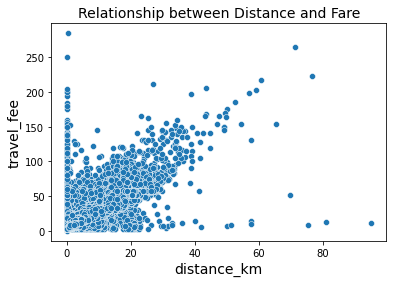

In [50]:
sb.scatterplot(x='distance_km', y='travel_fee', data=train)
plt.title('Relationship between Distance and Fare')

In [51]:
##### now looks nice, try to change the departure time to int like 1 is monday, 2 is tuesday.....

In [52]:
from datetime import datetime
train['departure_time'] = pd.to_datetime(train['departure_time']).dt.dayofweek + 1

train[["departure_time"]].describe()

departure_time
count   510270.000000
mean         4.037429
std          1.956876
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000

In [53]:
dayofweek_mapping = {
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday',
    7:'Sunday'
}

#train['departure_day'] = train['departure_time'].replace(dayofweek_mapping)
train.head()

ID  travel_fee  departure_time  departure_long  departure_lat  arrival_long  arrival_lat  occupancy  distance_km
316766   2013-06-21 12:08:00.000000133         8.0               5      -74.000292      40.747057    -74.007575    40.745992          6     0.624857
1122311  2013-03-02 23:46:00.000000159         9.0               6      -73.988875      40.736447    -74.006502    40.741407          1     1.584204
2534244  2013-02-14 18:44:00.000000226         5.0               4      -73.981167      40.780717    -73.974223    40.784020          5     0.690448
2066123    2013-01-21 15:08:29.0000006        19.0               1      -73.970862      40.761825    -73.956129    40.714208          1     5.438326
70562    2013-05-01 15:19:00.000000168        13.5               3      -73.980480      40.783507    -73.959402    40.772732          2     2.141363

In [54]:
corr_matrix = train.corr()
corr_matrix["travel_fee"].sort_values(ascending=False)

travel_fee        1.000000
distance_km       0.889112
occupancy         0.011680
departure_long    0.004048
arrival_long      0.003351
departure_time   -0.000781
arrival_lat      -0.002499
departure_lat    -0.002623
Name: travel_fee, dtype: float64

In [55]:
train.isna().sum()  #check na value again

ID                0
travel_fee        0
departure_time    0
departure_long    0
departure_lat     0
arrival_long      0
arrival_lat       0
occupancy         0
distance_km       0
dtype: int64

In [56]:
from pandas.plotting import scatter_matrix

num_attribs = ["travel_fee", "distance_km",
 "occupancy"]
scatter_matrix(train[num_attribs], figsize=(12, 8))
plt.show()

In [57]:
taxi = train.drop('travel_fee',axis=1)
taxi_fee = train['travel_fee'].copy()

In [58]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510270 entries, 316766 to 486314
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              510270 non-null  object 
 1   departure_time  510270 non-null  int64  
 2   departure_long  510270 non-null  float64
 3   departure_lat   510270 non-null  float64
 4   arrival_long    510270 non-null  float64
 5   arrival_lat     510270 non-null  float64
 6   occupancy       510270 non-null  int64  
 7   distance_km     510270 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 35.0+ MB


In [59]:
#from sys import orig_argv
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


class HaversineDistanceTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        distances = haversine_distance(X['departure_lat'], X['departure_long'],
                                       X['arrival_lat'], X['arrival_long'])
        return np.c_[X, distances]

num_attrs = ['occupancy']
#num_attrs = ['occupancy']
numerical_features = ['departure_long', 'departure_lat', 'arrival_long', 
                   'arrival_lat','occupancy','distance_km']
cat_attrs = ['departure_time']

columns_to_drop = ['departure_long', 'departure_lat', 'arrival_long', 
                   'arrival_lat', 'fee_per_km', 'departure_day']


def remove_zero_rows(data, columns):
    return data[data[columns] != 0].dropna()

num_pipeline = make_pipeline(
    #FunctionTransformer(remove_zero_rows, kw_args={'columns': num_attrs}),
    SimpleImputer(strategy='mean'),
    #FunctionTransformer(np.log1p, validate=False),
    StandardScaler()
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)


distance_pipeline = make_pipeline(
    HaversineDistanceTransformer(),
    StandardScaler()
)

preprocessing = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, cat_attrs),
    ('distance', distance_pipeline,[])
])

In [60]:
taxi_prepared = preprocessing.fit_transform(taxi)

In [61]:
taxi_prepared

array([[-0.06143683,  0.05710587, -0.0626376 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.05970447,  0.05549584, -0.06247478, ...,  0.        ,
         1.        ,  0.        ],
       [-0.0585349 ,  0.06221369, -0.05757691, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.05853733,  0.05308669, -0.05820221, ...,  0.        ,
         1.        ,  0.        ],
       [-0.05802993,  0.05695473, -0.06259162, ...,  0.        ,
         0.        ,  1.        ],
       [-0.0595758 ,  0.05357213, -0.06218315, ...,  0.        ,
         0.        ,  0.        ]])

In [62]:
taxi.head()

ID  departure_time  departure_long  departure_lat  arrival_long  arrival_lat  occupancy  distance_km
316766   2013-06-21 12:08:00.000000133               5      -74.000292      40.747057    -74.007575    40.745992          6     0.624857
1122311  2013-03-02 23:46:00.000000159               6      -73.988875      40.736447    -74.006502    40.741407          1     1.584204
2534244  2013-02-14 18:44:00.000000226               4      -73.981167      40.780717    -73.974223    40.784020          5     0.690448
2066123    2013-01-21 15:08:29.0000006               1      -73.970862      40.761825    -73.956129    40.714208          1     5.438326
70562    2013-05-01 15:19:00.000000168               3      -73.980480      40.783507    -73.959402    40.772732          2     2.141363

In [63]:
taxi_fee.head()

316766      8.0
1122311     9.0
2534244     5.0
2066123    19.0
70562      13.5
Name: travel_fee, dtype: float64

**Linear Regession**

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
forest_reg = make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
forest_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['departure_long',
                                                   'departure_lat',
                                                   'arrival_long',
                                                   'arrival_lat', 'occupancy',
                                                   'distance_km']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['departure_time']),
                                                 ('distance',
                                                  Pipeline(steps=[('haversinedistancetransformer',
                                                                   HaversineDistanceTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  [])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [65]:
forest_rmses = -cross_val_score(forest_reg, taxi, taxi_fee,scoring="neg_root_mean_squared_error",cv=3)
print("Validation error: "+str(forest_rmses[0]))
#validation error

Validation error: 3.7680962996140734


In [66]:
pd.Series(forest_rmses).describe()

count    3.000000
mean     3.832544
std      0.098645
min      3.768096
25%      3.775763
50%      3.783431
75%      3.864767
max      3.946104
dtype: float64

In [67]:
from sklearn.model_selection import cross_validate
forest_rmses = cross_validate(forest_reg,taxi, taxi_fee,scoring="neg_root_mean_squared_error",cv=2,return_train_score=True)
print(forest_rmses)

{'fit_time': array([269.54595923, 269.80663896]), 'score_time': array([14.93055344, 16.2060535 ]), 'test_score': array([-3.84786035, -3.87094375]), 'train_score': array([-1.44421259, -1.43724044])}


In [68]:
forest_reg.fit(taxi, taxi_fee)
taxi_predictions = forest_reg.predict(taxi)

In [69]:
pd.DataFrame(taxi_predictions, columns = ['taxi_predictions'])

taxi_predictions
0                 7.0100
1                 8.5400
2                 4.8400
3                19.6199
4                12.6100
...                  ...
510265           11.9150
510266           17.9200
510267            9.9200
510268           30.0315
510269            9.6750

[510270 rows x 1 columns]

In [70]:
plt.figure(figsize=(10,5))
plt.scatter(taxi_fee,taxi_predictions, color="red",label="Comparison between the actual and predicted data")
plt.legend()
plt.grid()
plt.plot(range(250), range(250))
plt.title("Random Forest Regression")
plt.xlabel("predicted data")
plt.ylabel("actual data")
plt.show()

In [71]:
from sklearn import metrics
# R-squared helps us understand how well the predictions match the real outcomes.
# R-squared closer to 1 means predictions are very close to their actual scores vice versa
metrics.r2_score(taxi_fee,taxi_predictions)

0.9824244547725713

In [72]:
forest_rmse = mean_squared_error(taxi_fee,taxi_predictions,squared=False)
print("training error: "+str(forest_rmse))
#training error

training error: 1.4048874656087877


In [73]:
print("training error: "+str(forest_rmse))
print("Validation error: "+str(forest_rmses[0]))

training error: 1.4048874656087877


KeyError: 0